In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_theme()

C:\Users\kusdi\ADOBE\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df=pd.read_csv('../data/main_dataset.csv')
df

,id,date,likes,content,username,media,inferred company
0,1,2020-12-12 00:47:00,1,"Spend your weekend morning with a Ham, Egg, an...",TimHortonsPH,[Photo(previewUrl='https://pbs.twimg.com/media...,tim hortons
1,2,2018-06-30 10:04:20,2750,Watch rapper <mention> freestyle for over an H...,IndyMusic,[Photo(previewUrl='https://pbs.twimg.com/media...,independent
2,3,2020-09-29 19:47:28,57,Canadian Armenian community demands ban on mil...,CBCCanada,[Photo(previewUrl='https://pbs.twimg.com/media...,cbc
3,4,2020-10-01 11:40:09,152,"1st in Europe to be devastated by COVID-19, It...",MKWilliamsRome,[Photo(previewUrl='https://pbs.twimg.com/media...,williams
4,5,2018-10-19 14:30:46,41,Congratulations to Pauletha Butts of <mention>...,BGISD,[Photo(previewUrl='https://pbs.twimg.com/media...,independent
...,...,...,...,...,...,...,...
17326,17327,2020-12-12 03:15:00,56,"After 66 years together, this couple died of #...",cbcnewsbc,[Video(thumbnailUrl='https://pbs.twimg.com/amp...,cbc
17327,17328,2018-02-09 21:47:11,2,Where to add wireless measurements &amp;amp; a...,EMR_Automation,[Photo(previewUrl='https://pbs.twimg.com/media...,emerson
17328,17329,2018-05-03 14:26:09,181,This is what happened outside a Bromley pollin...,Independent,[Video(thumbnailUrl='https://pbs.twimg.com/ext...,independent
17329,17330,2020-01-27 11:52:03,0,Int’l Day Of Education: CSO Sensitises Childre...,IndependentNGR,[Photo(previewUrl='https://pbs.twimg.com/media...,independent


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17331 entries, 0 to 17330
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                17331 non-null  int64 
 1   date              17331 non-null  object
 2   likes             17331 non-null  int64 
 3   content           17331 non-null  object
 4   username          17331 non-null  object
 5   media             17331 non-null  object
 6   inferred company  17331 non-null  object
dtypes: int64(2), object(5)
memory usage: 947.9+ KB


In [4]:
df.describe()

,id,likes
count,17331.000000,17331.000000
mean,8666.000000,718.392130
std,5003.173093,3866.475948
min,1.000000,0.000000
25%,4333.500000,3.000000
50%,8666.000000,73.000000
75%,12998.500000,352.000000
max,17331.000000,254931.000000


In [5]:
df['datetime'] = pd.to_datetime(df['date'])
df['hour_of_day'] = df['datetime'].dt.hour
df['day_of_week'] = df['datetime'].dt.dayofweek
df['month'] = df['datetime'].dt.month
df.head()

,id,date,likes,content,username,media,inferred company,datetime,hour_of_day,day_of_week,month
0,1,2020-12-12 00:47:00,1,"Spend your weekend morning with a Ham, Egg, an...",TimHortonsPH,[Photo(previewUrl='https://pbs.twimg.com/media...,tim hortons,2020-12-12 00:47:00,0,5,12
1,2,2018-06-30 10:04:20,2750,Watch rapper <mention> freestyle for over an H...,IndyMusic,[Photo(previewUrl='https://pbs.twimg.com/media...,independent,2018-06-30 10:04:20,10,5,6
2,3,2020-09-29 19:47:28,57,Canadian Armenian community demands ban on mil...,CBCCanada,[Photo(previewUrl='https://pbs.twimg.com/media...,cbc,2020-09-29 19:47:28,19,1,9
3,4,2020-10-01 11:40:09,152,"1st in Europe to be devastated by COVID-19, It...",MKWilliamsRome,[Photo(previewUrl='https://pbs.twimg.com/media...,williams,2020-10-01 11:40:09,11,3,10
4,5,2018-10-19 14:30:46,41,Congratulations to Pauletha Butts of <mention>...,BGISD,[Photo(previewUrl='https://pbs.twimg.com/media...,independent,2018-10-19 14:30:46,14,4,10


In [6]:
def extract_media_type(media_str):
    if not isinstance(media_str, str):
        return 'None'
    match = re.search(r"\[(Photo|Video|Gif)", media_str)
    if match:
        return match.group(1)
    return 'None'

df['media_type'] = df['media'].apply(extract_media_type)
df.head()

,id,date,likes,content,username,media,inferred company,datetime,hour_of_day,day_of_week,month,media_type
0,1,2020-12-12 00:47:00,1,"Spend your weekend morning with a Ham, Egg, an...",TimHortonsPH,[Photo(previewUrl='https://pbs.twimg.com/media...,tim hortons,2020-12-12 00:47:00,0,5,12,Photo
1,2,2018-06-30 10:04:20,2750,Watch rapper <mention> freestyle for over an H...,IndyMusic,[Photo(previewUrl='https://pbs.twimg.com/media...,independent,2018-06-30 10:04:20,10,5,6,Photo
2,3,2020-09-29 19:47:28,57,Canadian Armenian community demands ban on mil...,CBCCanada,[Photo(previewUrl='https://pbs.twimg.com/media...,cbc,2020-09-29 19:47:28,19,1,9,Photo
3,4,2020-10-01 11:40:09,152,"1st in Europe to be devastated by COVID-19, It...",MKWilliamsRome,[Photo(previewUrl='https://pbs.twimg.com/media...,williams,2020-10-01 11:40:09,11,3,10,Photo
4,5,2018-10-19 14:30:46,41,Congratulations to Pauletha Butts of <mention>...,BGISD,[Photo(previewUrl='https://pbs.twimg.com/media...,independent,2018-10-19 14:30:46,14,4,10,Photo


In [7]:
df['likes_log'] = np.log1p(df['likes'])
df.head()

,id,date,likes,content,username,media,inferred company,datetime,hour_of_day,day_of_week,month,media_type,likes_log
0,1,2020-12-12 00:47:00,1,"Spend your weekend morning with a Ham, Egg, an...",TimHortonsPH,[Photo(previewUrl='https://pbs.twimg.com/media...,tim hortons,2020-12-12 00:47:00,0,5,12,Photo,0.693147
1,2,2018-06-30 10:04:20,2750,Watch rapper <mention> freestyle for over an H...,IndyMusic,[Photo(previewUrl='https://pbs.twimg.com/media...,independent,2018-06-30 10:04:20,10,5,6,Photo,7.919720
2,3,2020-09-29 19:47:28,57,Canadian Armenian community demands ban on mil...,CBCCanada,[Photo(previewUrl='https://pbs.twimg.com/media...,cbc,2020-09-29 19:47:28,19,1,9,Photo,4.060443
3,4,2020-10-01 11:40:09,152,"1st in Europe to be devastated by COVID-19, It...",MKWilliamsRome,[Photo(previewUrl='https://pbs.twimg.com/media...,williams,2020-10-01 11:40:09,11,3,10,Photo,5.030438
4,5,2018-10-19 14:30:46,41,Congratulations to Pauletha Butts of <mention>...,BGISD,[Photo(previewUrl='https://pbs.twimg.com/media...,independent,2018-10-19 14:30:46,14,4,10,Photo,3.737670


In [8]:
try:
    quantiles = df['likes'].quantile([0.25, 0.5, 0.75]).tolist()
    bins = [-1] + quantiles + [np.inf] # Bins: [-1, 25%, 50%, 75%, infinity]
    labels = ['low', 'medium', 'high', 'very_high']
    df['likes_band'] = pd.cut(df['likes'], bins=bins, labels=labels)
    print("Created 'likes_log' and 'likes_band' features.")
except Exception as e:
    print(f"Could not create like bands (maybe not enough data?): {e}")
df.head()

Created 'likes_log' and 'likes_band' features.


,id,date,likes,content,username,media,inferred company,datetime,hour_of_day,day_of_week,month,media_type,likes_log,likes_band
0,1,2020-12-12 00:47:00,1,"Spend your weekend morning with a Ham, Egg, an...",TimHortonsPH,[Photo(previewUrl='https://pbs.twimg.com/media...,tim hortons,2020-12-12 00:47:00,0,5,12,Photo,0.693147,low
1,2,2018-06-30 10:04:20,2750,Watch rapper <mention> freestyle for over an H...,IndyMusic,[Photo(previewUrl='https://pbs.twimg.com/media...,independent,2018-06-30 10:04:20,10,5,6,Photo,7.919720,very_high
2,3,2020-09-29 19:47:28,57,Canadian Armenian community demands ban on mil...,CBCCanada,[Photo(previewUrl='https://pbs.twimg.com/media...,cbc,2020-09-29 19:47:28,19,1,9,Photo,4.060443,medium
3,4,2020-10-01 11:40:09,152,"1st in Europe to be devastated by COVID-19, It...",MKWilliamsRome,[Photo(previewUrl='https://pbs.twimg.com/media...,williams,2020-10-01 11:40:09,11,3,10,Photo,5.030438,high
4,5,2018-10-19 14:30:46,41,Congratulations to Pauletha Butts of <mention>...,BGISD,[Photo(previewUrl='https://pbs.twimg.com/media...,independent,2018-10-19 14:30:46,14,4,10,Photo,3.737670,medium


In [9]:
df['content_length'] = df['content'].astype(str).apply(len)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17331 entries, 0 to 17330
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id                17331 non-null  int64         
 1   date              17331 non-null  object        
 2   likes             17331 non-null  int64         
 3   content           17331 non-null  object        
 4   username          17331 non-null  object        
 5   media             17331 non-null  object        
 6   inferred company  17331 non-null  object        
 7   datetime          17331 non-null  datetime64[ns]
 8   hour_of_day       17331 non-null  int32         
 9   day_of_week       17331 non-null  int32         
 10  month             17331 non-null  int32         
 11  media_type        17331 non-null  object        
 12  likes_log         17331 non-null  float64       
 13  likes_band        17331 non-null  category      
 14  content_length    1733

Saved likes_distribution.png


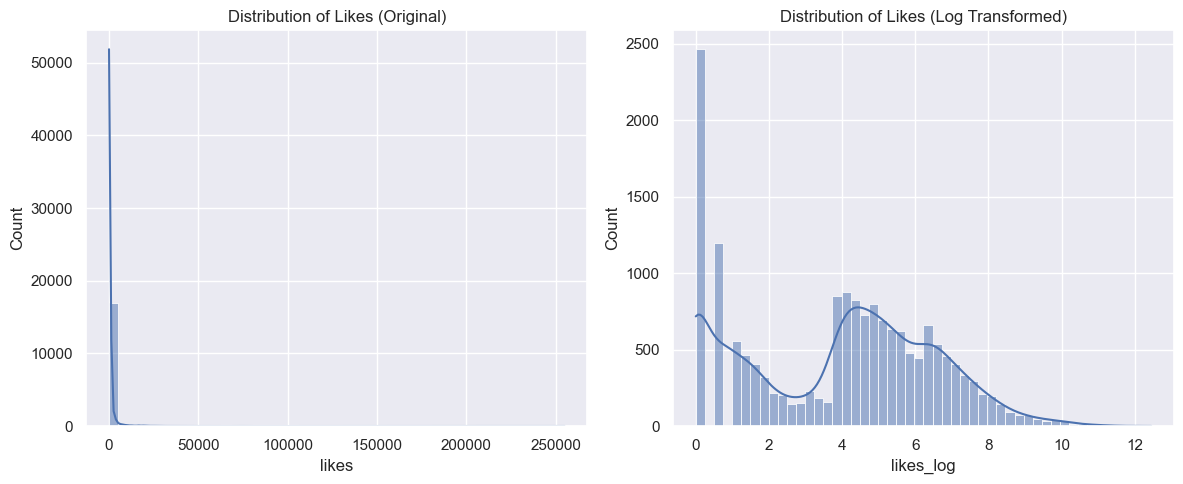

In [10]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['likes'], kde=True, bins=50)
plt.title('Distribution of Likes (Original)')

plt.subplot(1, 2, 2)
sns.histplot(df['likes_log'], kde=True, bins=50)
plt.title('Distribution of Likes (Log Transformed)')
plt.tight_layout()
plt.savefig("../results/likes_distribution.png")
print("Saved likes_distribution.png")

Saved categorical_features.png


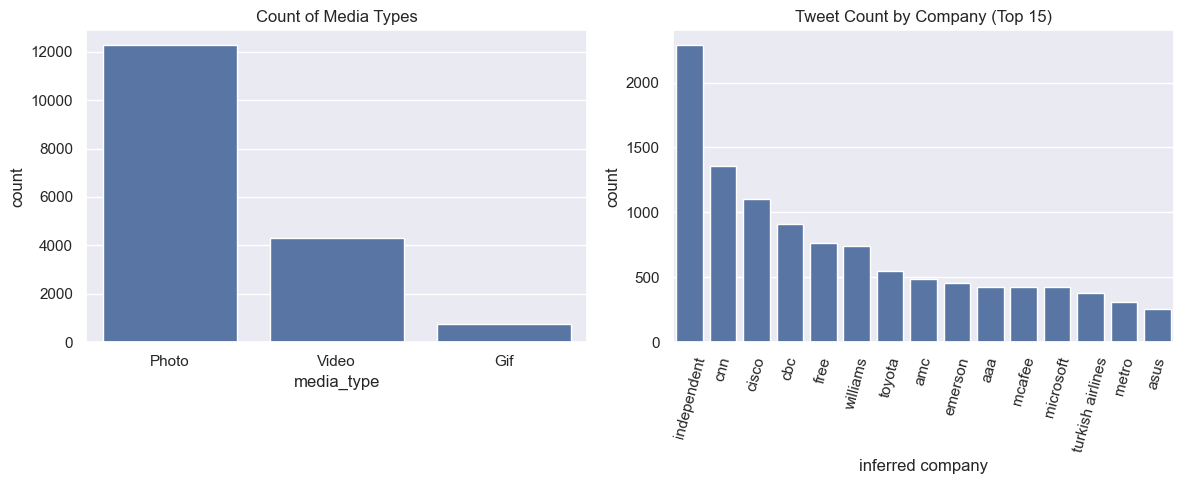

In [11]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.countplot(data=df, x='media_type', order=df['media_type'].value_counts().index)
plt.title('Count of Media Types')

plt.subplot(1, 2, 2)
top_companies = df['inferred company'].value_counts().index[:15]
sns.countplot(data=df[df['inferred company'].isin(top_companies)], x='inferred company', order=top_companies)
plt.title('Tweet Count by Company (Top 15)')
plt.xticks(rotation=75)
plt.tight_layout()
plt.savefig("../results/categorical_features.png")
print("Saved categorical_features.png")

Saved time_features.png


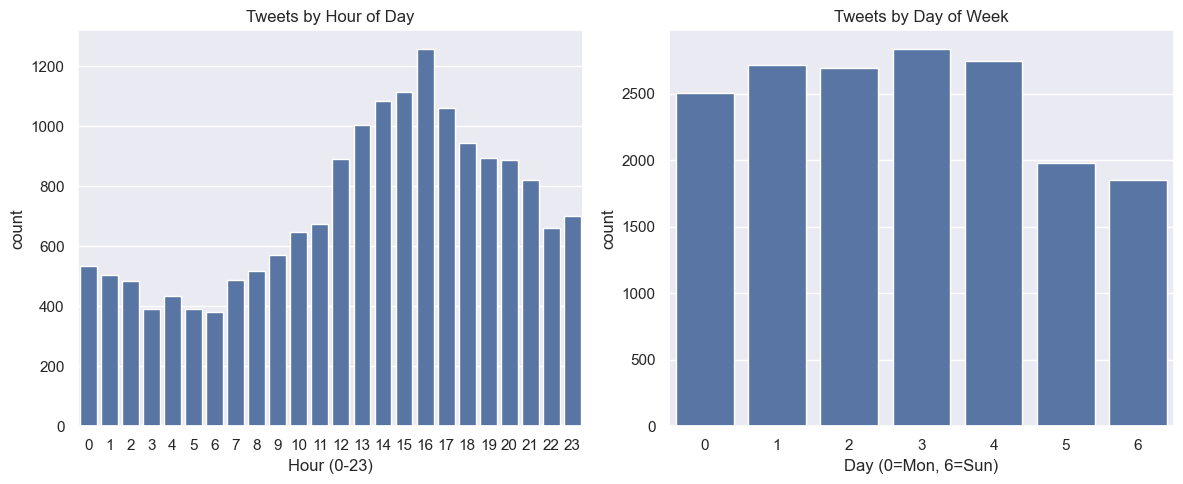

In [12]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.countplot(data=df, x='hour_of_day')
plt.title('Tweets by Hour of Day')
plt.xlabel('Hour (0-23)')

plt.subplot(1, 2, 2)
sns.countplot(data=df, x='day_of_week')
plt.title('Tweets by Day of Week')
plt.xlabel('Day (0=Mon, 6=Sun)')
plt.tight_layout()
plt.savefig("../results/time_features.png")
print("Saved time_features.png")

In [13]:
def create_prompt(row):

    prompt = f"company: {row['inferred company']} | " \
             f"media: {row['media_type']} | " \
             f"likes_band: {row['likes_band']} | " \
             f"hour: {row['hour_of_day']} | " \
             f"day: {row['day_of_week']} | " \
             f"month: {row['month']} | " \
             f"generate tweet:"
    return prompt

In [14]:
df['prompt'] = df.apply(create_prompt, axis=1)
df['content'] = df['content'].astype(str)
df.head()

,id,date,likes,content,username,media,inferred company,datetime,hour_of_day,day_of_week,month,media_type,likes_log,likes_band,content_length,prompt
0,1,2020-12-12 00:47:00,1,"Spend your weekend morning with a Ham, Egg, an...",TimHortonsPH,[Photo(previewUrl='https://pbs.twimg.com/media...,tim hortons,2020-12-12 00:47:00,0,5,12,Photo,0.693147,low,181,company: tim hortons | media: Photo | likes_ba...
1,2,2018-06-30 10:04:20,2750,Watch rapper <mention> freestyle for over an H...,IndyMusic,[Photo(previewUrl='https://pbs.twimg.com/media...,independent,2018-06-30 10:04:20,10,5,6,Photo,7.919720,very_high,73,company: independent | media: Photo | likes_ba...
2,3,2020-09-29 19:47:28,57,Canadian Armenian community demands ban on mil...,CBCCanada,[Photo(previewUrl='https://pbs.twimg.com/media...,cbc,2020-09-29 19:47:28,19,1,9,Photo,4.060443,medium,104,company: cbc | media: Photo | likes_band: medi...
3,4,2020-10-01 11:40:09,152,"1st in Europe to be devastated by COVID-19, It...",MKWilliamsRome,[Photo(previewUrl='https://pbs.twimg.com/media...,williams,2020-10-01 11:40:09,11,3,10,Photo,5.030438,high,140,company: williams | media: Photo | likes_band:...
4,5,2018-10-19 14:30:46,41,Congratulations to Pauletha Butts of <mention>...,BGISD,[Photo(previewUrl='https://pbs.twimg.com/media...,independent,2018-10-19 14:30:46,14,4,10,Photo,3.737670,medium,199,company: independent | media: Photo | likes_ba...


In [15]:
df['inferred company'].unique()

array(['tim hortons', 'independent', 'cbc', 'williams', 'cnn', 'cisco',
       'getty images', 'mcafee', 'trane', 'pfizer', 'toyota', 'bell',
       'walmart', 'general motors', 'mayo clinic', 'nokia', 'desjardins',
       'ups', 'monster', 'united rentals', 'aaa', 'hobby lobby',
       'bacardi', 'amc', 'amway', 'shoprite', 'oracle',
       'turkish airlines', 'shell', 'free', 'microsoft', 'cameron',
       'sabc', 'emerson', 'bayer', 'heineken', 'samsung', 'no', 'td',
       'target', 'qatar airways', 'hudson', 'metro', 'ericsson',
       'peugeot', 'pepsico', 'avon', 'opel', 'amazon',
       'national geographic', 'mtn', 'comcast', 'icici bank', 'asus',
       'rona', 'arm', 'little caesars pizza', 'staples', 'scotiabank',
       'blackberry', 'padi', 'lane bryant', 'lenovo', 'bar', 'wwf',
       'mastercard', 'spotify', 'groupon', 'red bull', 'greenpeace',
       'harris teeter', 'aa', 'paramount pictures', 'virgin media',
       'urban outfitters', 'john deere', 'paytm', 'sap',
  

In [16]:
# data exploration and processing done
df.to_csv("../data/processed_data.csv")